## - 불러올 패키지 목록

In [1]:
# 수학 함수 패키지
import math

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.formula.api import *
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\Admission.csv')
df

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.columns

Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance_of_Admit'],
      dtype='object')

In [4]:
df = df[['Chance_of_Admit', 'GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
df

,Chance_of_Admit,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research
0,0.92,337,118,4,4.5,4.5,9.65,1
1,0.76,324,107,4,4.0,4.5,8.87,1
2,0.72,316,104,3,3.0,3.5,8.00,1
3,0.80,322,110,3,3.5,2.5,8.67,1
4,0.65,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,0.82,324,110,3,3.5,3.5,9.04,1
396,0.84,325,107,3,3.0,3.5,9.11,1
397,0.91,330,116,4,5.0,4.5,9.45,1
398,0.67,312,103,3,3.5,4.0,8.78,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Chance_of_Admit  400 non-null    float64
 1   GRE              400 non-null    int64  
 2   TOEFL            400 non-null    int64  
 3   Univ_Rating      400 non-null    int64  
 4   SOP              400 non-null    float64
 5   LOR              400 non-null    float64
 6   CGPA             400 non-null    float64
 7   Research         400 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Chance_of_Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97
GRE,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
Univ_Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00


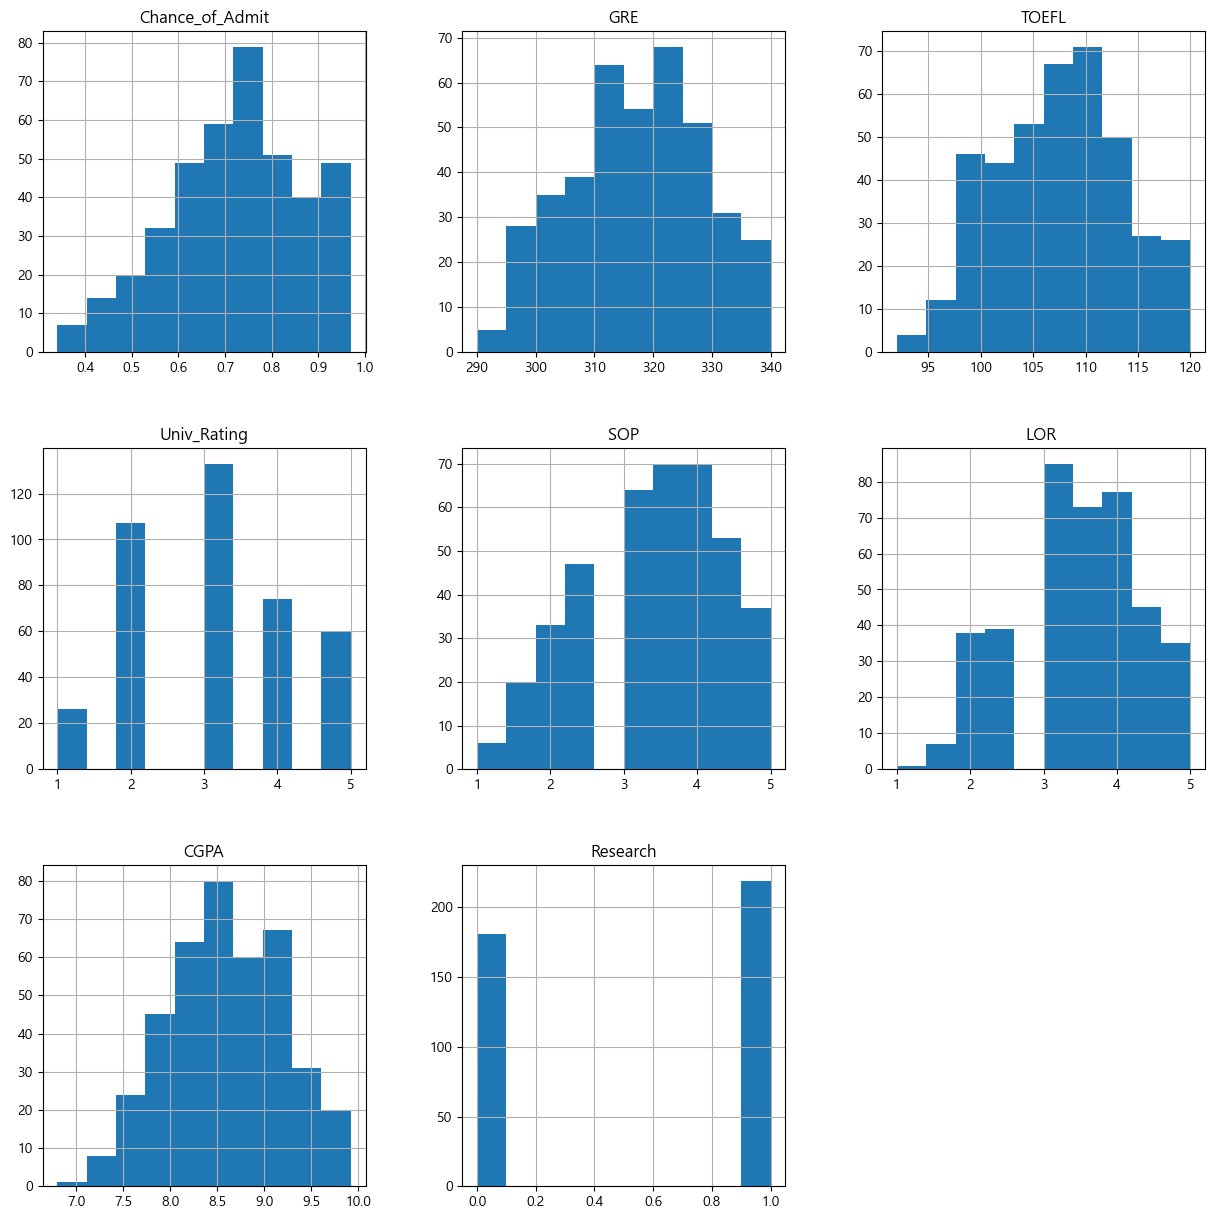

In [7]:
df.hist( figsize = (15,15))
plt.show()

In [8]:
df_admission = df.copy()

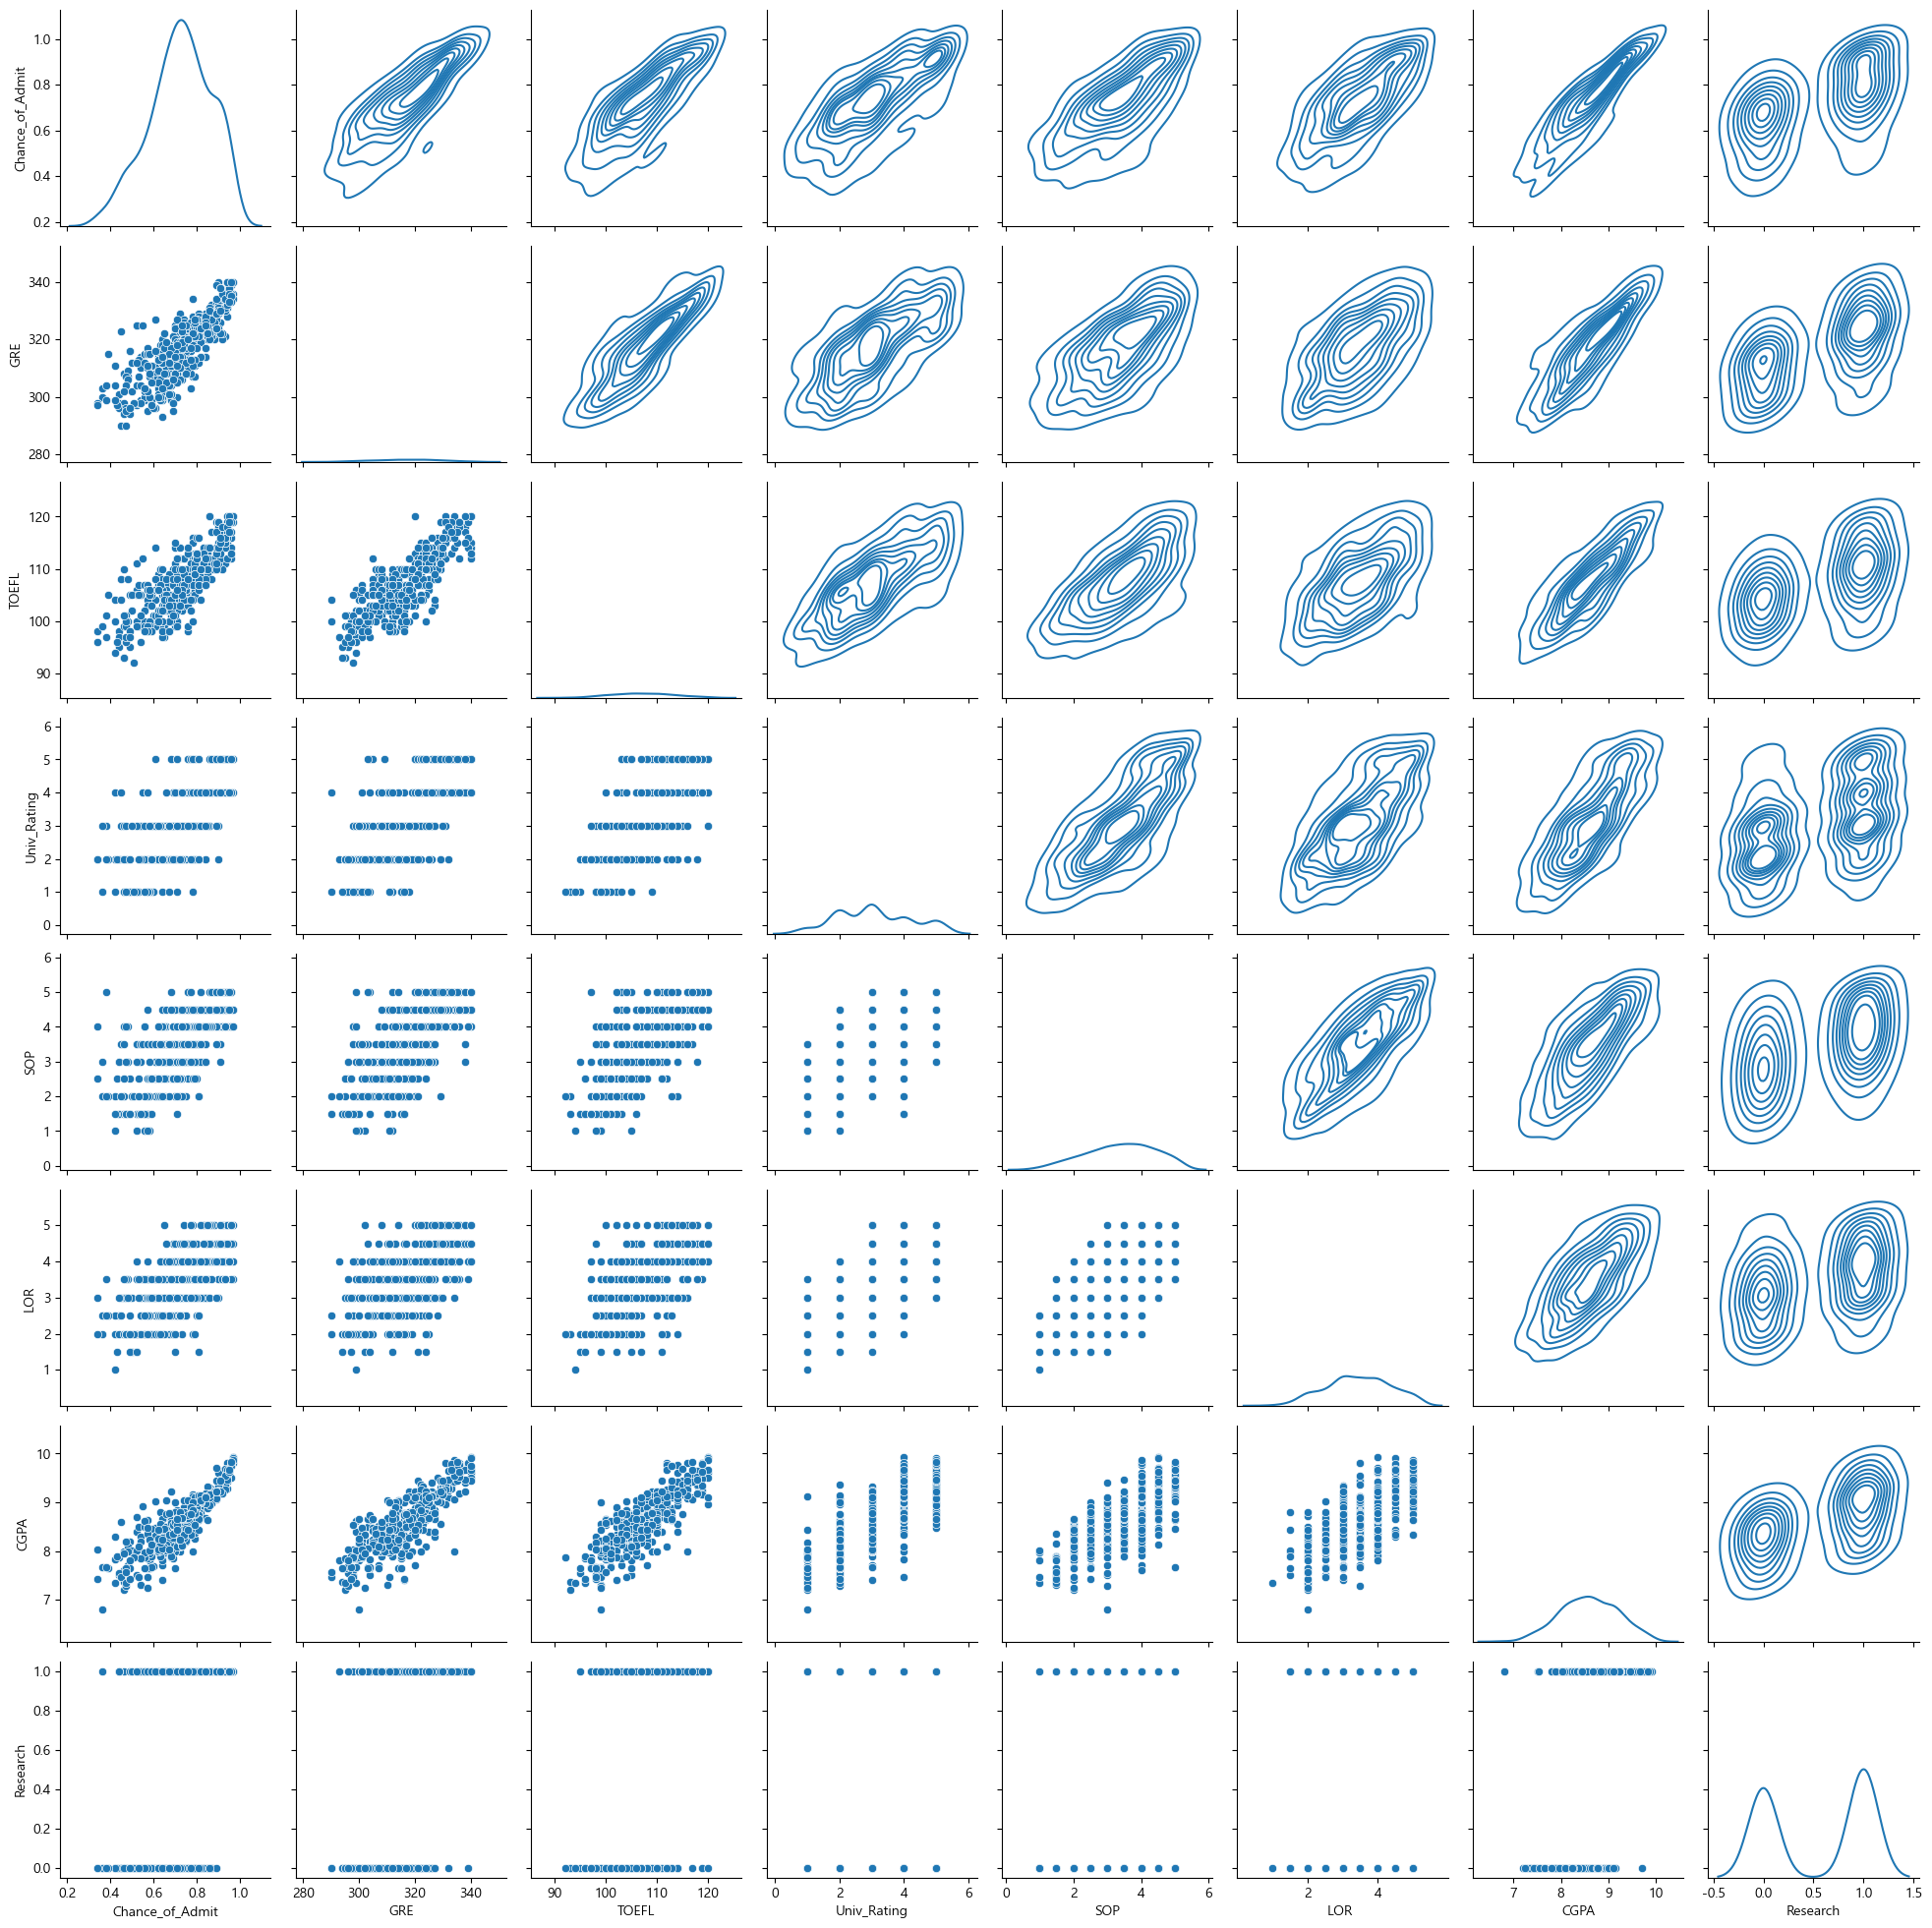

In [9]:
g = sb.PairGrid( df_admission )

g.map_upper( sb.kdeplot )
g.map_lower( sb.scatterplot )
g.map_diag( sb.kdeplot )

plt.show()

In [10]:
df_admission.pairwise_corr().round(4)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,Chance_of_Admit,GRE,pearson,two-sided,400,0.8026,"[0.76, 0.83]",0.0,4.541e+87,1.0
1,Chance_of_Admit,TOEFL,pearson,two-sided,400,0.7916,"[0.75, 0.83]",0.0,3.267e+83,1.0
2,Chance_of_Admit,Univ_Rating,pearson,two-sided,400,0.7113,"[0.66, 0.76]",0.0,2.629e+59,1.0
3,Chance_of_Admit,SOP,pearson,two-sided,400,0.6757,"[0.62, 0.73]",0.0,1.768e+51,1.0
4,Chance_of_Admit,LOR,pearson,two-sided,400,0.6699,"[0.61, 0.72]",0.0,1.028e+50,1.0
5,Chance_of_Admit,CGPA,pearson,two-sided,400,0.8733,"[0.85, 0.89]",0.0,2.935e+122,1.0
6,Chance_of_Admit,Research,pearson,two-sided,400,0.5532,"[0.48, 0.62]",0.0,1.633e+30,1.0
7,GRE,TOEFL,pearson,two-sided,400,0.8360,"[0.8, 0.86]",0.0,1.007e+102,1.0
8,GRE,Univ_Rating,pearson,two-sided,400,0.6690,"[0.61, 0.72]",0.0,6.632e+49,1.0
9,GRE,SOP,pearson,two-sided,400,0.6128,"[0.55, 0.67]",0.0,1.957e+39,1.0


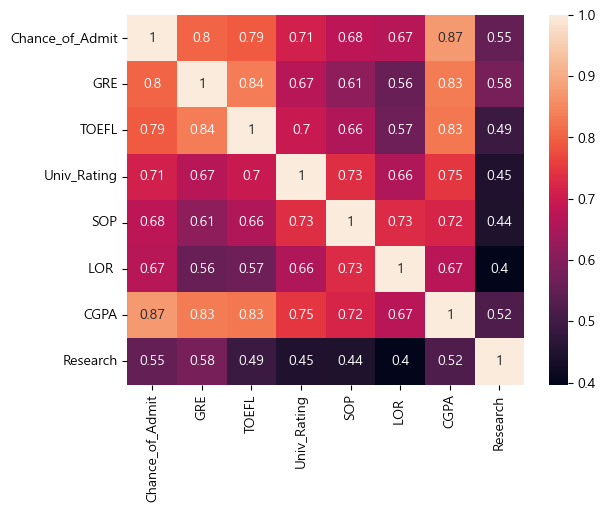

In [11]:
corr_mat = df_admission.corr()

sb.heatmap( corr_mat, annot = True )
plt.show()

In [12]:
df_admission

,Chance_of_Admit,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research
0,0.92,337,118,4,4.5,4.5,9.65,1
1,0.76,324,107,4,4.0,4.5,8.87,1
2,0.72,316,104,3,3.0,3.5,8.00,1
3,0.80,322,110,3,3.5,2.5,8.67,1
4,0.65,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,0.82,324,110,3,3.5,3.5,9.04,1
396,0.84,325,107,3,3.0,3.5,9.11,1
397,0.91,330,116,4,5.0,4.5,9.45,1
398,0.67,312,103,3,3.5,4.0,8.78,0


In [13]:
# 목표변수와 나머지 변수들을 따로 저장
x = df_admission.iloc[: , 1:8]
y = df_admission.iloc[:, 0 ]

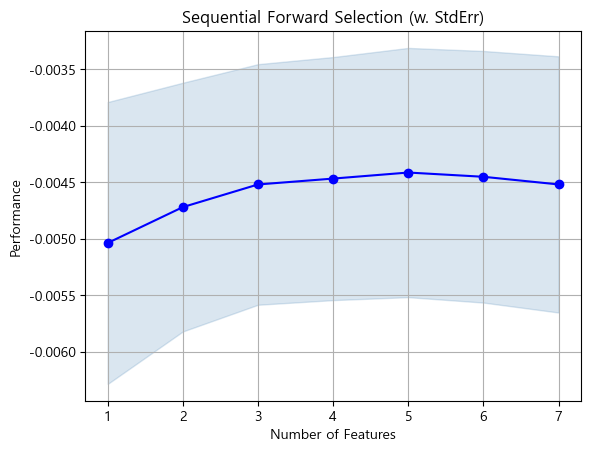

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(5,)","[-0.006116558738316345, -0.01423556077450292, ...",-0.005037,"(CGPA,)",0.002779,0.003741,0.001247
2,"(0, 5)","[-0.005940886020429956, -0.013018383148665111,...",-0.004719,"(GRE, CGPA)",0.002452,0.003301,0.0011
3,"(0, 4, 5)","[-0.005611526180568498, -0.011948938287946041,...",-0.004519,"(GRE, LOR , CGPA)",0.002372,0.003193,0.001064
4,"(0, 4, 5, 6)","[-0.005265942142934693, -0.011989663402541957,...",-0.004467,"(GRE, LOR , CGPA, Research)",0.002396,0.003226,0.001075
5,"(0, 1, 4, 5, 6)","[-0.005173177012578153, -0.012321974008668643,...",-0.004414,"(GRE, TOEFL, LOR , CGPA, Research)",0.002457,0.003308,0.001103
6,"(0, 1, 3, 4, 5, 6)","[-0.00519003586658736, -0.012332374586226979, ...",-0.004451,"(GRE, TOEFL, SOP, LOR , CGPA, Research)",0.00248,0.00334,0.001113
7,"(0, 1, 2, 3, 4, 5, 6)","[-0.005155676781104596, -0.012341839030910967,...",-0.004519,"(GRE, TOEFL, Univ_Rating, SOP, LOR , CGPA, Res...",0.002525,0.0034,0.001133


In [14]:
lr = LinearRegression()

selector = SFS( lr, k_features=7,
                forward=True, floating=True,
                scoring='neg_mean_squared_error',
                cv=10, n_jobs=-1)

selector.fit(x,y)

fig = plot_sfs(selector.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

pd.DataFrame.from_dict(selector.get_metric_dict()).T

In [15]:
x = x.iloc[:,[0, 1, 4, 5, 6]]

# 상수항 추가
x = add_constant(x)

model = OLS( y, x )
fit_model = model.fit()

print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Sat, 04 Sep 2021   Prob (F-statistic):          2.04e-136
Time:                        04:44:33   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2985      0.117    -11.070      0.0

In [16]:
# 분산확대인자를 데이터프레임 형식으로 출력 (1)


pd.DataFrame( {'X' : column,
               'VIF' : variance_inflation_factor(model.exog, i)}
               for i, column in enumerate(model.exog_names)  )

,X,VIF
0,const,1354.362849
1,GRE,4.585053
2,TOEFL,4.104255
3,LOR,1.829491
4,CGPA,4.808767
5,Research,1.530007


In [17]:
y_pred = fit_model.predict(x)

print('MSE =', mean_squared_error(y, y_pred, squared = True).round(4) )
print()
print('RMSE =', mean_squared_error(y, y_pred, squared = False).round(4) )
print()

MSE = 0.004

RMSE = 0.0633



In [18]:
# 잔차
residual = fit_model.resid

# 표준화 잔차
r_norm = fit_model.resid_pearson

pd.DataFrame( { 'Predict' : y_pred,
                'Residual' : residual,
                'normalized Residual' : r_norm } ).round(3)

,Predict,Residual,normalized Residual
0,0.955,-0.035,-0.543
1,0.804,-0.044,-0.686
2,0.652,0.068,1.062
3,0.739,0.061,0.949
4,0.635,0.015,0.233
...,...,...,...
395,0.811,0.009,0.148
396,0.812,0.028,0.443
397,0.912,-0.002,-0.029
398,0.723,-0.053,-0.837


<AxesSubplot:ylabel='Density'>

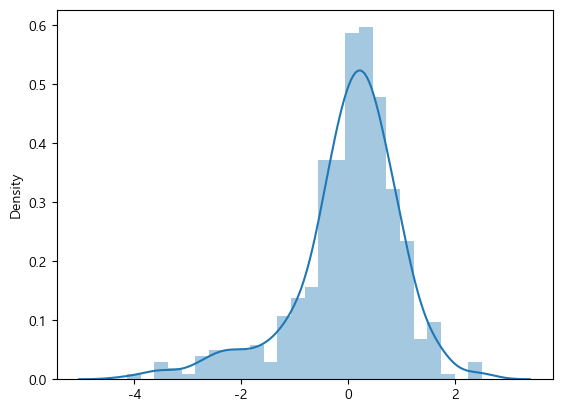

In [19]:
# 히스토그램
sb.distplot(r_norm)

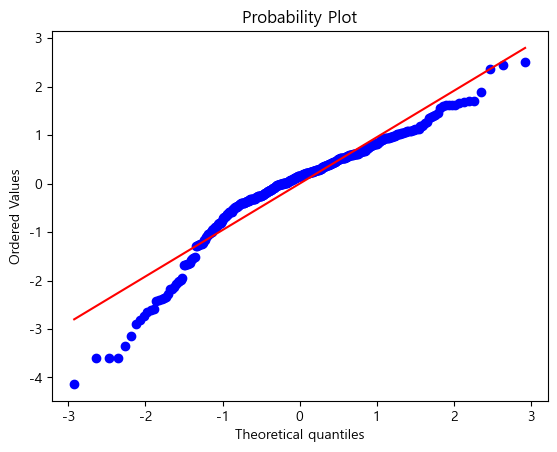

In [20]:
# Q-Q plot

stats.probplot( r_norm, plot = plt )
plt.show()

In [21]:
# 더빈-왓슨 통계량
durbin_watson( r_norm )

0.7499111207304133

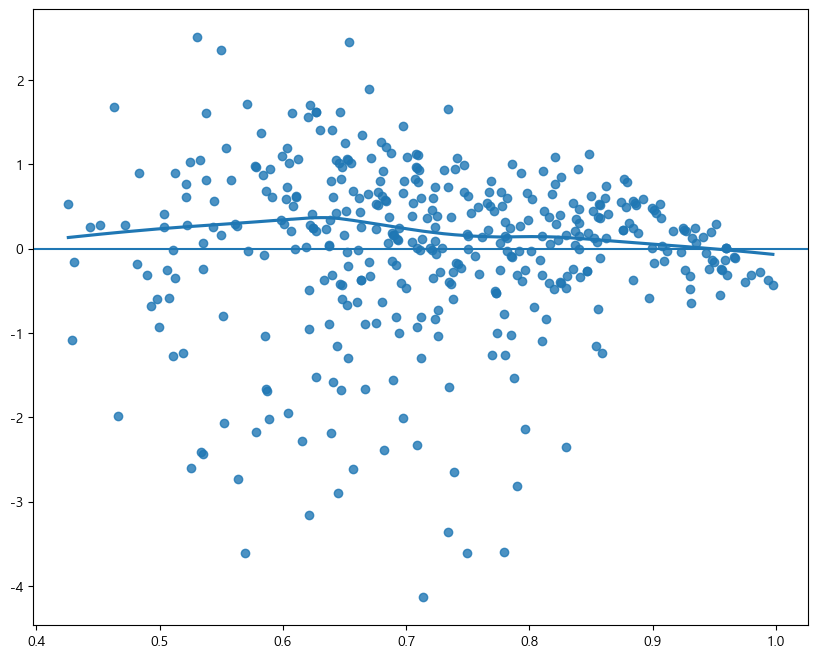

In [22]:
# 표준화잔차 vs. 적합값 도표 

fig, ax = plt.subplots( figsize = (10,8) )
sb.regplot( x = y_pred, y =r_norm, lowess = True )
ax.axhline(y=0)

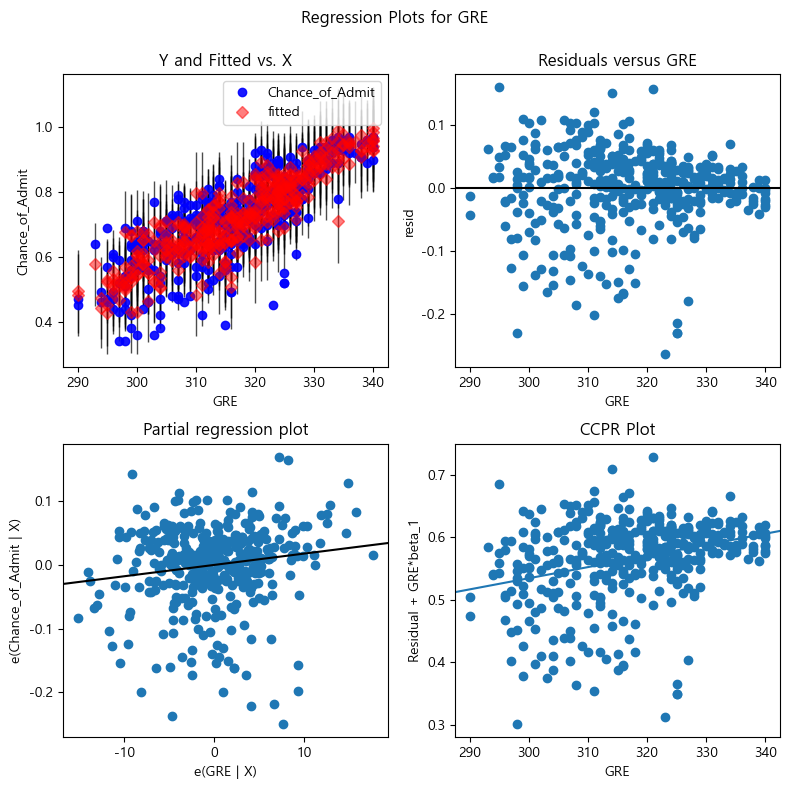

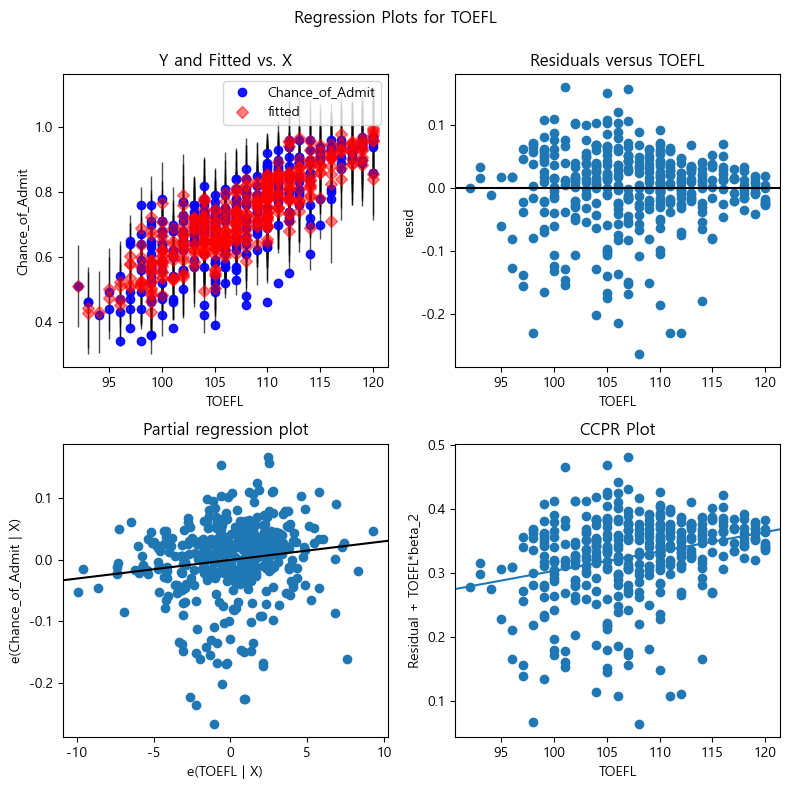

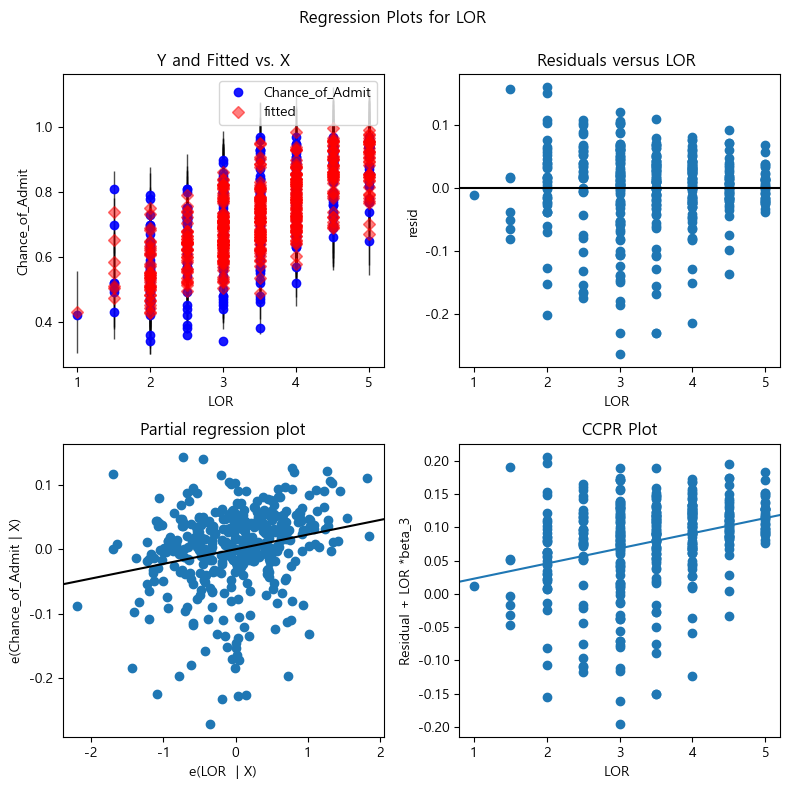

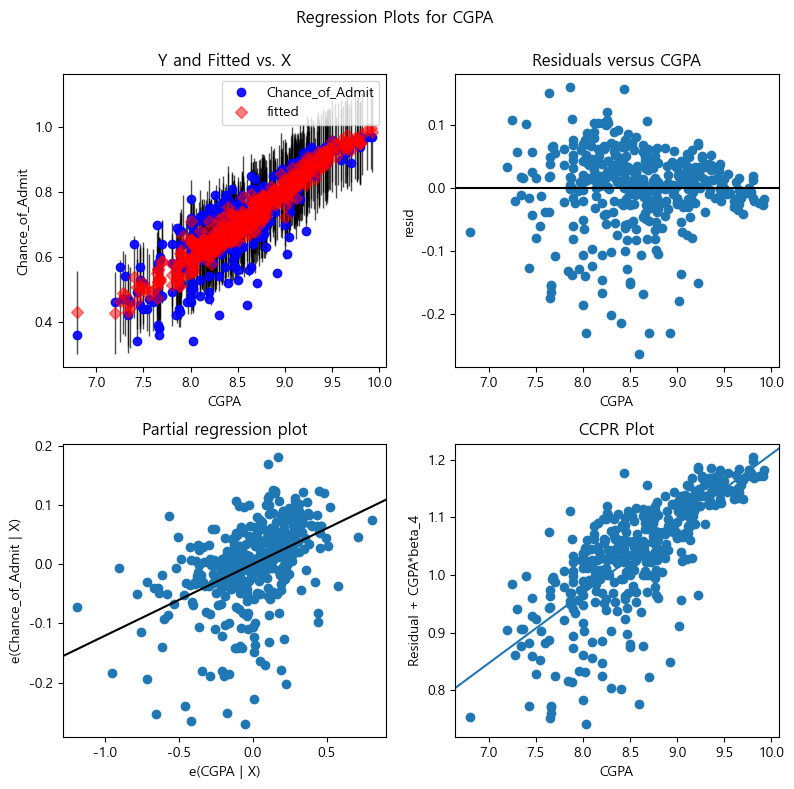

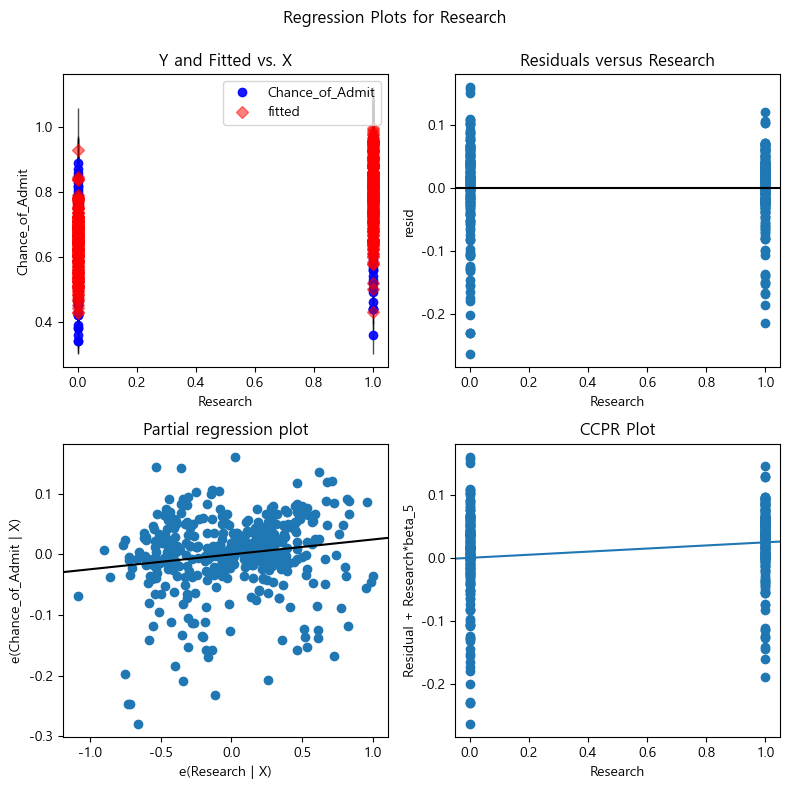

In [23]:
for i in list(range(1,6,1)):
    fig = plt.figure(figsize = (8, 8))
    fig = graphics.plot_regress_exog( fit_model, x.iloc[:,i].name, fig = fig)
    plt.show()